In [1]:
#jupman-purge-output
#RICORDATI DI ESEGUIRE QUESTA CELLA!
import sys;
sys.path.append('../../../'); 
import jupman;

# Esame Lun 28, Giu 2021 - Modulo B

**Seminari Python - Triennale Sociologia @Università di Trento**

## [Scarica](../../../_static/generated/sps-2021-06-28-exam.zip) esercizi e soluzioni

## B1 Game of Thrones

Apri con Pandas il file [game-of-thrones.csv](game-of-thrones.csv) che contiene gli episodi in varie annate. 

- usa l'encoding `UTF-8`

B1.1) Ti viene fornito un dizionario `preferiti` con gli episodi preferiti di un gruppo di persone, che però non si ricordano esattamente i vari titoli che sono quindi spesso incompleti: Seleziona gli episodi preferiti da Paolo e Chiara

- assumi che la capitalizzazione in `preferiti` sia quella corretta
- **NOTA**: il dataset contiene insidiose doppie virgolette `"` attorno ai titoli, ma se scrivi il codice nel modo giusto questo non dovrebbe essere un problema

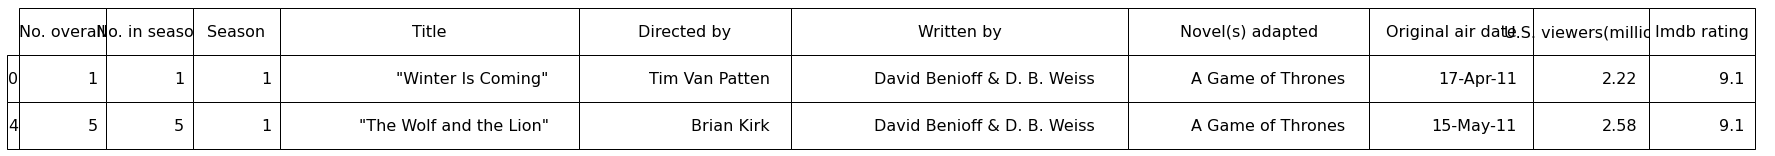

In [2]:

import pandas as pd
import numpy as np    # importiamo numpy e per comodità lo rinominiamo in 'np'

preferiti = {
    "Paolo" : 'Winter Is',
    "Chiara" : 'Wolf and the Lion',
    "Anselmo" : 'Fire and',
    "Letizia" : 'Garden of'
}


# scrivi qui
df = pd.read_csv('game-of-thrones.csv', encoding='UTF-8')

titolidf = df[  (df["Title"].str.contains(preferiti['Paolo'])) | (df["Title"].str.contains(preferiti['Chiara']))] 

titolidf

#jupman-purge
jupman.draw_df(titolidf)
#/jupman-purge

B1.2) Seleziona tutti gli episodi che sono stati mandati per la prima volta in onda in un certo `anno` (colonna `Original air date`)

- **NOTA**: `anno` ti viene fornito come `int`

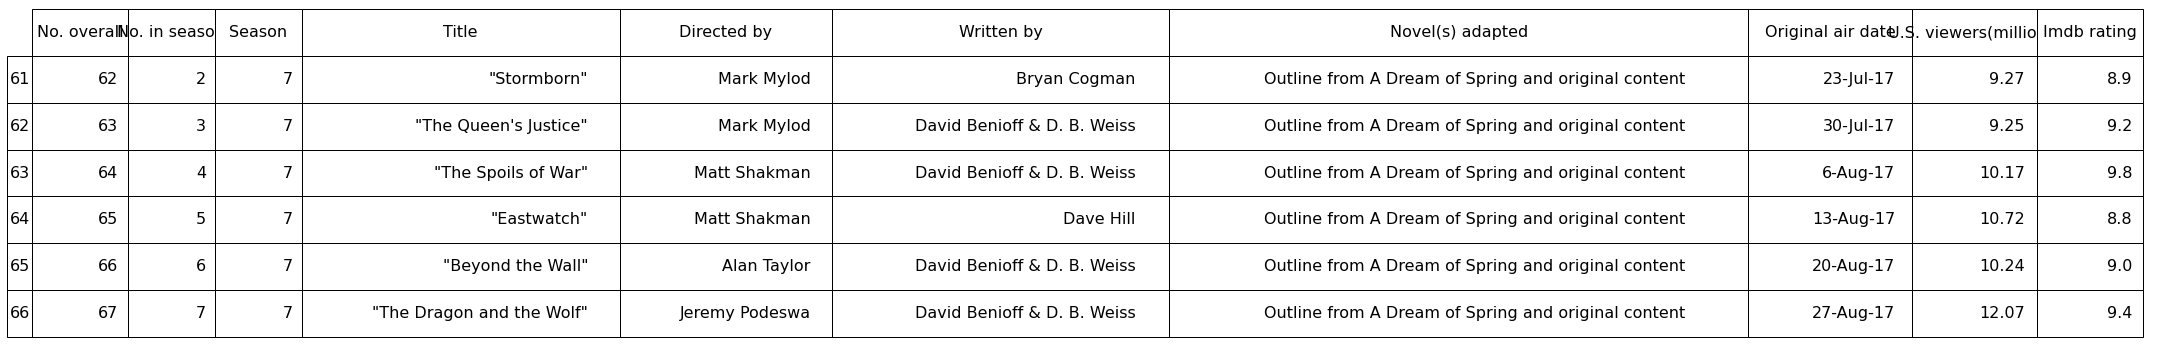

In [3]:
anno = 17

# scrivi qui
annidf = df[ df['Original air date'].str[-2:] == str(anno)  ]
annidf

#jupman-purge
jupman.draw_df(annidf)
#/jupman-purge


## B2 Punti di interesse universiadi

Scrivi una funzione che dato il file [punti-interesse.csv](punti-interesse.csv) dei punti di interesse di Trento individuati per le Universiadi 2013, RITORNA una lista ordinata e senza duplicati con tutti i nomi che trovi nella colonna `CATEGORIA`. 

Sorgente dati: [dati.trentino.it](https://dati.trentino.it/dataset/poi-trento)

- **USA un csv.reader e l'encoding** `latin-1`
- non includere categorie vuote nel risultato
- alcune categorie sono in realtà più di una divise da trattino, separale in categorie distinte:

    Esempi:
    - `Banca- Bancomat-Cambiovaluta`
    - `Centro commerciale-Grande magazzino`    

In [4]:
import csv

def cercat(file_csv):
    #jupman-raise
        
    with open(file_csv, encoding='latin-1', newline='') as f:
        lettore = csv.reader(f, delimiter=',')
        next(lettore)
        ret = set()    
        for riga in lettore:
            for elem in riga[3].split('-'):            
                if elem.strip() != '':
                    ret.add(elem.strip())
        
    return sorted(ret)
    #/jupman-raise

risultato = cercat('punti-interesse.csv')
print(risultato)

atteso = ['Affitta Camere', 'Agriturismo', 'Alimentari', 'Appartamento Vacanze', 
          'Autostazione', 'Banca', 'Bancomat', 'Bar', 'Bed & Breakfast', 'Biblioteca',
          'Birreria', 'Bus Navetta', 'Cambiovaluta', 'Camping', 'Centro Wellness',
          'Centro commerciale', 'Corrieri', 'Discoteca', 'Editoria', 'Farmacia', 'Funivia',
          'Gelateria', 'Grande magazzino', 'Hotel', 'Istituzioni', 'Mercatini', 'Mercato',
          'Monumento', 'Museo', 'Noleggio Sci', 'Numeri utili', 'Parcheggio', 'Pasticceria',
          'Piscina', 'Posta', 'Prodotti tipici', 'Pub', 'Residence', 'Rifugio', 'Ristorante',
          'Scuola Sci', 'Sede Trentino Trasporti', 'Snow Park', 'Souvenir', 'Sport', 'Stadio',
          'Stadio del ghiaccio', 'Stazione dei Treni', 'Taxi', 'Teatro', 'Ufficio informazioni turistiche']
#TEST
print()
for i in range(len(atteso)):
    if risultato[i] != atteso[i]:
        print("ERRORE ALL'ELEMENTO %s:" % i)
        print('   ATTESO:', atteso[i])
        print('  TROVATO:', risultato[i])
        break

['Affitta Camere', 'Agriturismo', 'Alimentari', 'Appartamento Vacanze', 'Autostazione', 'Banca', 'Bancomat', 'Bar', 'Bed & Breakfast', 'Biblioteca', 'Birreria', 'Bus Navetta', 'Cambiovaluta', 'Camping', 'Centro Wellness', 'Centro commerciale', 'Corrieri', 'Discoteca', 'Editoria', 'Farmacia', 'Funivia', 'Gelateria', 'Grande magazzino', 'Hotel', 'Istituzioni', 'Mercatini', 'Mercato', 'Monumento', 'Museo', 'Noleggio Sci', 'Numeri utili', 'Parcheggio', 'Pasticceria', 'Piscina', 'Posta', 'Prodotti tipici', 'Pub', 'Residence', 'Rifugio', 'Ristorante', 'Scuola Sci', 'Sede Trentino Trasporti', 'Snow Park', 'Souvenir', 'Sport', 'Stadio', 'Stadio del ghiaccio', 'Stazione dei Treni', 'Taxi', 'Teatro', 'Ufficio informazioni turistiche']



## B3 gratt

Il profilo di una città può essere rappresentato come una lista 2D dove gli `1` rappredentano gli edifici. Nell'esempio sotto, l'altezza dell'edificio più alto è `4` (la seconda colonna da destra)


```python
[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1]]
```


Scrivi una funzione che prende un profilo come lista 2-D di `0` e `1` e RITORNA l'altezza del grattacielo più alto, per altri esempi vedere gli assert.

In [5]:
#jupman-purge-io

#Credits: esercizio preso da [Edabit Tallest Skyscraper](https://edabit.com/challenge/76ibd8jZxvhAwDskb)    

In [6]:

def gratt(mat):
    #jupman-raise
    n,m = len(mat), len(mat[0])
    for i in range(n):
        for j in range(m):
            if mat[i][j] == 1:
                return n-i
    return 0
    #/jupman-raise
    
assert gratt([[0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 1, 0],
              [1, 1, 1, 1, 1, 1]])  == 4
    
assert gratt([
  [0, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 1, 1, 0],
  [1, 1, 1, 1]
]) == 3

assert gratt([
  [0, 1, 0, 0],
  [0, 1, 0, 0],
  [0, 1, 1, 0],
  [1, 1, 1, 1]
]) == 4

assert gratt([
  [0, 0, 0, 0],
  [0, 0, 0, 0],
  [1, 1, 1, 0],
  [1, 1, 1, 1]
]) == 2

## B4 scendisali

Scrivi una funzione che date le dimensioni di `n` righe  e `m` colonne RITORNA una NUOVA matrice numpy n x m con sequenze che scendono e salgono a righe alterne come negli esempi

- se `m` è dispari, lancia `ValueError`


```python
>>> scendisali(6,10)
array([[0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
       [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
       [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
       [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.]])
```


In [7]:
import numpy as np

def scendisali(n,m):
    #jupman-raise    
    if m%2 == 1:
        raise ValueError("m deve essere pari, trovato %s" % m)    
    mat = np.zeros((n,m))
    for i in range(0,n,2):
        for j in range(m//2):
            mat[i,j+m//2] = m//2 - j - 1
    for i in range(1,n,2):
        for j in range(m//2):
            mat[i,j] = j
    return mat
    #/jupman-raise
    

assert np.allclose(scendisali(1,2),  np.array([[0., 0.],
                                               [0., 0.]]))
assert type(scendisali(1,2)) == np.ndarray

assert np.allclose(scendisali(2,6),  np.array([[0., 0., 0., 2., 1., 0.],
                                               [0., 1., 2., 0., 0., 0.]]))

assert np.allclose(scendisali(6,10), np.array([[0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
                                               [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.],
                                               [0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
                                               [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.],
                                               [0., 0., 0., 0., 0., 4., 3., 2., 1., 0.],
                                               [0., 1., 2., 3., 4., 0., 0., 0., 0., 0.]]))
try:
    scendisali(2,3)
    raise Exception("Avrei dovuto fallire prima!")
except ValueError:
    pass